# Aufgabenblatt 2

<p style="border-left:5px solid red;padding:0.6em;box-sizing:border-box;">
<strong>Lernziele:</strong><br/>
    Diese Übung führt sie an die digitale Natur von Messsignalen, sowie den Einfluss verschiedener Messgrössen, heran.
</p>

<p style="border-left:5px solid blue;padding:0.6em;box-sizing:border-box;">
<strong>Wichtigste Funktionen für diese Übung:</strong><br/>
    Dies sind die wichtigsten Funktionen die sie während dieser Übung benötigen:<br>
    Die jeweilige Syntax beschreibt eine examplarische Verwendung. Im allgemeinen haben die Funktionen weitere Argumente die übergeben werden können. Der Funktionsname ist jeweils ein Link zur offiziellen Dokumentation, welche alle Argumente darlegt und die Funktion beschreibt. <br>
    <b>Funktionen zur Datenanlyse </b><br> 
    <a href="https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html">data = numpy.loadtxt(filepath, <em>optional arguments</em>)</a> Lädt die Daten in einem Dokument und schreibt die Daten in eine Variable <em>data</em><br>
    <a href="https://numpy.org/doc/stable/reference/generated/numpy.sort.html">sortedarray = numpy.sort(data)</a> Sortiert das Array <em>data</em>. Stadardmässig wird das Array aufsteigend sortiert.<br>
    <a href="https://numpy.org/doc/stable/reference/generated/numpy.diff.html">res = numpy.diff(data)</a> Berechnet standardmässig die erste diskrete Differenz der Einträge des Arrays <em>data</em>. Das resultierende Array wird um einen Eintrag kürzer sein als das Ursprüngliche.<br>
    <a href="https://numpy.org/doc/stable/reference/generated/numpy.min.html">res = numpy.min(data)</a>Gibt den Minimalwert im Array <em>data</em> zurück.<br>
    <a href="https://numpy.org/doc/stable/reference/generated/numpy.histogram.html">hist = numpy.histogram(data, number_of_bins)</a> Sortiert die Daten <em>data</em> in <em>number_of_bins</em> gleich grossen Bins ein. Der Rückgabewert ist ein Array, welches die Grenzen und die Population der Bins enthält.<br>
    <b>Funktionen zum Plotten: </b><br>
    <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html">figure = matplotlib.pyplot.figure()</a> Erstellt eine neue Figur und gibt den Handle zu dieser zurück.<br>
    <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html">axis = matplotlib.pyplot.subplot(nrows, ncolumn, index)</a> Erstellt einen neuen Plot in der aktuellen Figur. Erlaubt es mehrere Figuren in einem Plot zu haben. Mittels der Argumente kann der <em>index</em>te Plot in einem Grid aus <em>nrows</em> Reihen und <em>ncolumns</em> Spalten erstellt werden.<br>
    <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html">axis.plot(x, y)</a> Plotted die Daten x,y in einem Graphen.<br>
    <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html">axis.set_xlabel(label)</a> Erstelle ein Label für die X-Achse des aktuellen Graphen.<br>
    <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html">axis.set_ylabel(label)</a> Erstelle ein Label für die Y-Achse des aktuellen Graphen.<br>
    <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html">axis.set_title(title)</a> Erstelle einen Titel für den aktuellen Graphen.<br>
    <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html">axis.bar(x, heights, width)</a> Erstelle ein Balkendiagramm mit den Balken an den Positionen x und den Höhen <em>heights</em>. Die Breite der Balken kann über den Parameter <em>width</em> angepasst werden.<br>
</p>
</p>

In [122]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Aufgabe 1: Auflösung einer Messung

In dieser Übung schauen wir uns den Einfluss der Auflösung des Signalwerts einer Messung auf die Analyse an. Hierfür haben Sie vier Dateien mit Messdaten, die Sie im Ordner "Aufgabe 1" finden. Alle vier Messungen wurden am gleichen System durchgeführt, aber sie haben unterschiedliche Auflösungen.

## a)

Lesen Sie die Messdaten ein und stellen Sie für jede Messung die gemessene Grösse als Funktion der Zeit dar.

Tipp: Jupyter Notebooks unterstützen auch interaktive Plots. Sie können diese Funktion durch das Ausführen des folgenden Codes aktivieren.

In [ ]:
%matplotlib notebook

Um die interaktiven Plots wieder auszuschalten verwenden Sie:

In [ ]:
%matplotlib inline

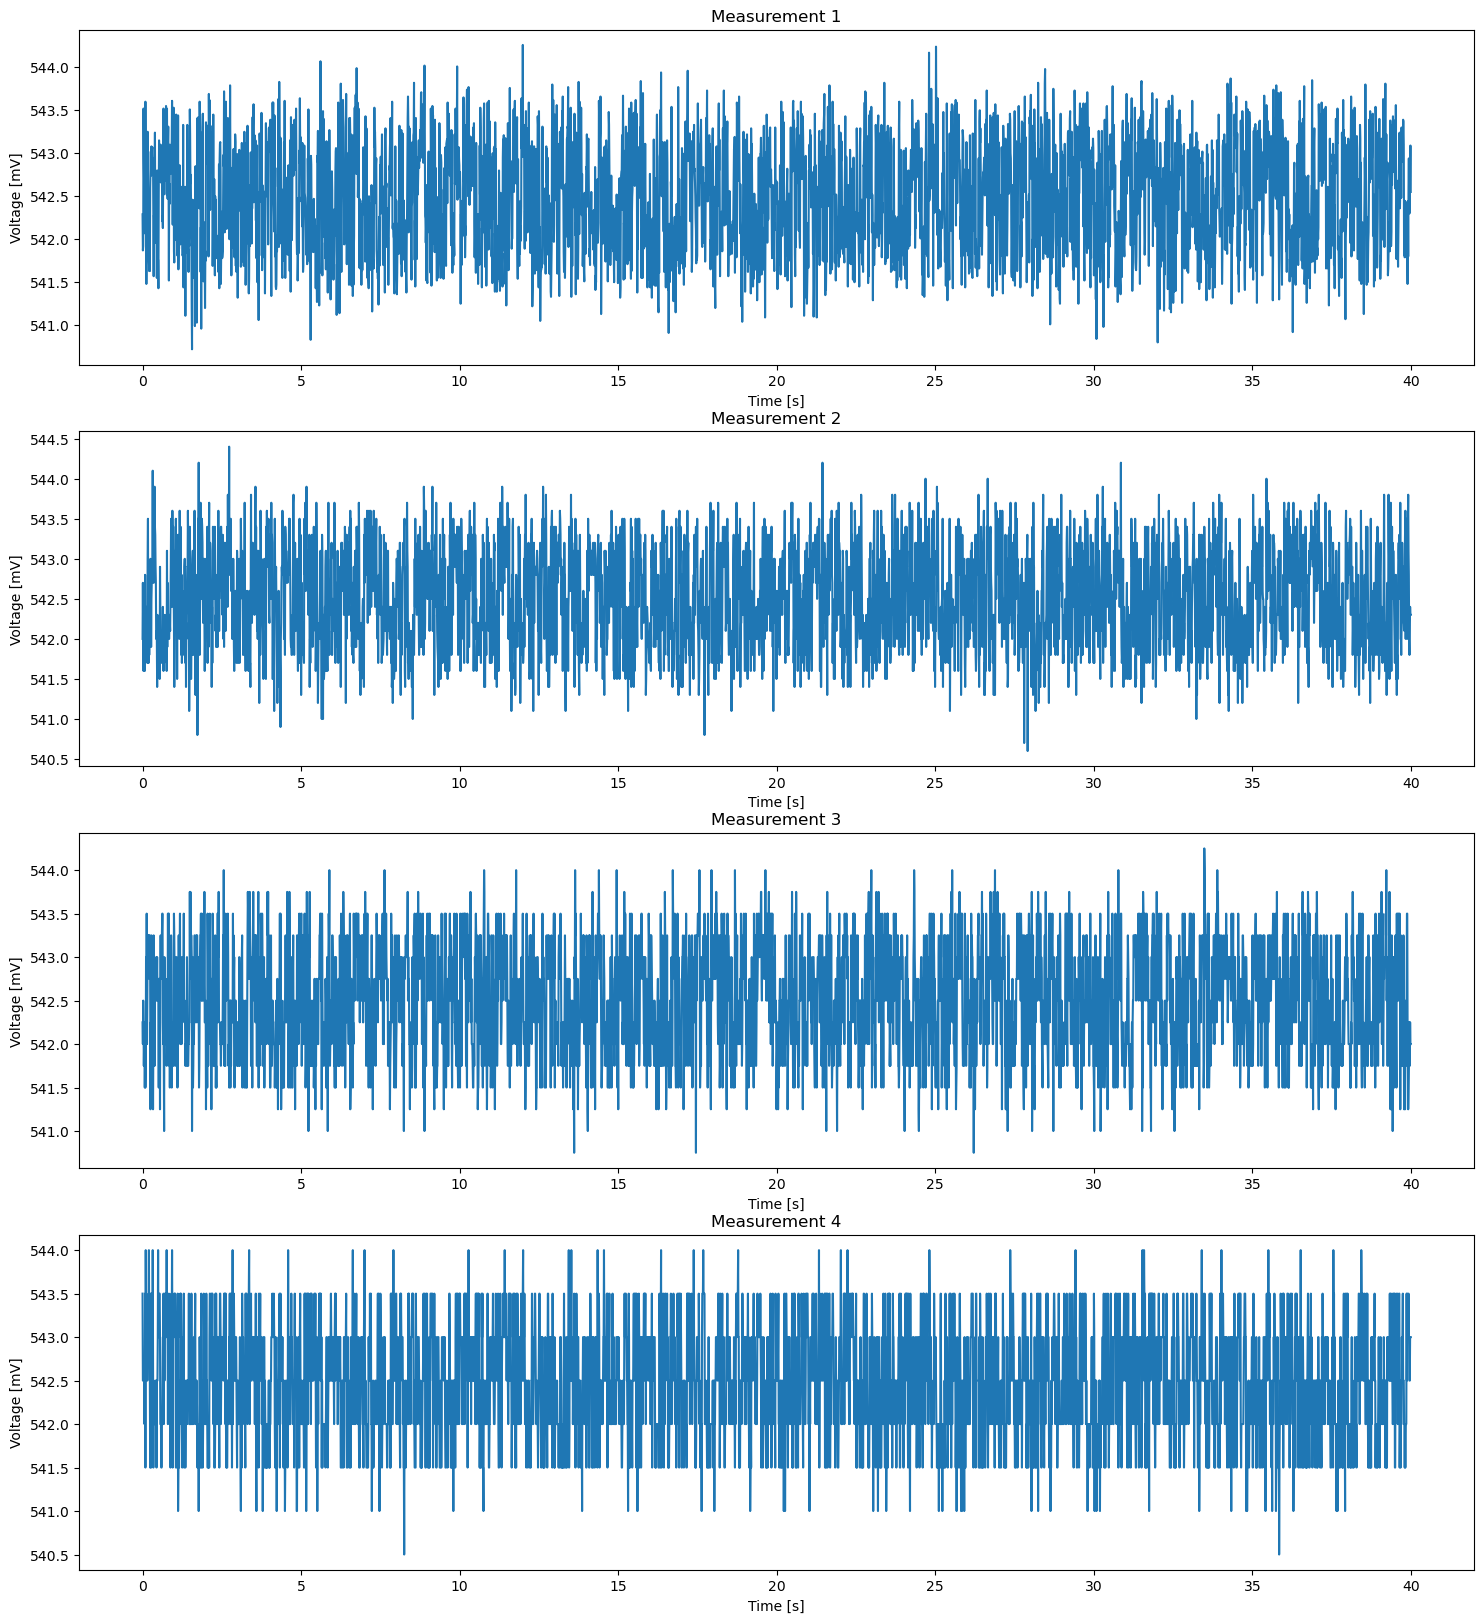

In [94]:
data1 = np.loadtxt('Aufgabe1/measurement_1.txt', comments='#', delimiter=',')
data2 = np.loadtxt('Aufgabe1/measurement_2.txt', comments='#', delimiter=',')
data3 = np.loadtxt('Aufgabe1/measurement_3.txt', comments='#', delimiter=',')
data4 = np.loadtxt('Aufgabe1/measurement_4.txt', comments='#', delimiter=',')
data = np.array([data1, data2, data3, data4])

fig, ax = plt.subplots(4, figsize=(18,20))
for i, d in enumerate(data):
    ax[i].set_title(f'Measurement {i+1}')
    ax[i].set_xlabel('Time [s]')
    ax[i].set_ylabel('Voltage [mV]')
    ax[i].plot(d[:, 0], d[:, 1])

## b)

Bestimmen Sie zu jeder Messung die Auflösung in der Signalgrösse (hier Spannung). Nützliche Funktionen hierfür sind z.B. `np.diff`, `np.sort` und `np.min`.

In [81]:
res = np.zeros(4)
for i, d in enumerate(data):
    res[i] = np.min(np.diff(np.unique(np.sort(d[:, 1]))))
    print(f'Data {i+1} has resolution {res[i]:.2}')

Data 1 has resolution 0.01
Data 2 has resolution 0.1
Data 3 has resolution 0.25
Data 4 has resolution 0.5


## **Hintergrund: Erstellen von Grafen**

Eine der wichtigsten Schritte beim Verarbeiten und Verstehen von Daten ist die grafische Darstellung der Werte. Eine weit verbreitetes Package ist `matplotlib`, es beinhaltet zahlreiche Möglichkeiten beliebig komplizierte Plots zu erstellen. Für die meisten Anwendungen genügt es jedoch aus `matplotlib.pyplot` mit `subplots` eine Figur und die dazugehörigen Achsen zu erstellen, und dann mit `plot` die Werte darzustellen. Zu jedem Plot gehört die Achsenbeschriftung, die mit `ax.set_xlabel` und  `ax.set_ylabel` erstellt werden kann (dazu gehören auch immer die Einheiten der dargestellten Grössen). Um klarzumachen, was dargestellt ist, kann mit `ax.set_title` ein Titel erstellt werden, was insbesondere dann hilfreich ist, wenn es keinen erklärenden Text zum Plot gibt (z.B. hier im Notebook oder in einer Präsentation).

Text(0.5, 1.0, 'Wurfparabel')

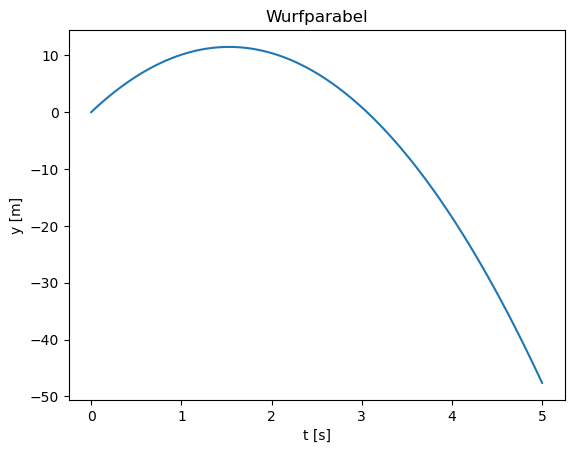

In [70]:
import matplotlib.pyplot as plt
t = np.linspace(0, 5, 100)
y = 15 * t - 9.81 / 2 * t**2

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(t, y)
ax.set_xlabel('t [s]')
ax.set_ylabel('y [m]')
ax.set_title('Wurfparabel')

## c)

Plotten Sie nochmal die Daten und beschriften Sie die Plots mit der zugehörigen Signalauflösung. Da die Punkte auf der x-Achse sehr dicht beieinander liegen, lässt sich nicht viel erkennen. Schauen Sie sich deswegen kleinere Bereiche auf der x-Achse an, z.B. 10 Sekunden, 5 Sekunden, 1 Sekunde, 0.1 Sekunden... Können Sie eine Struktur erkennen? Wie wirkt sich die Auflösung aus?

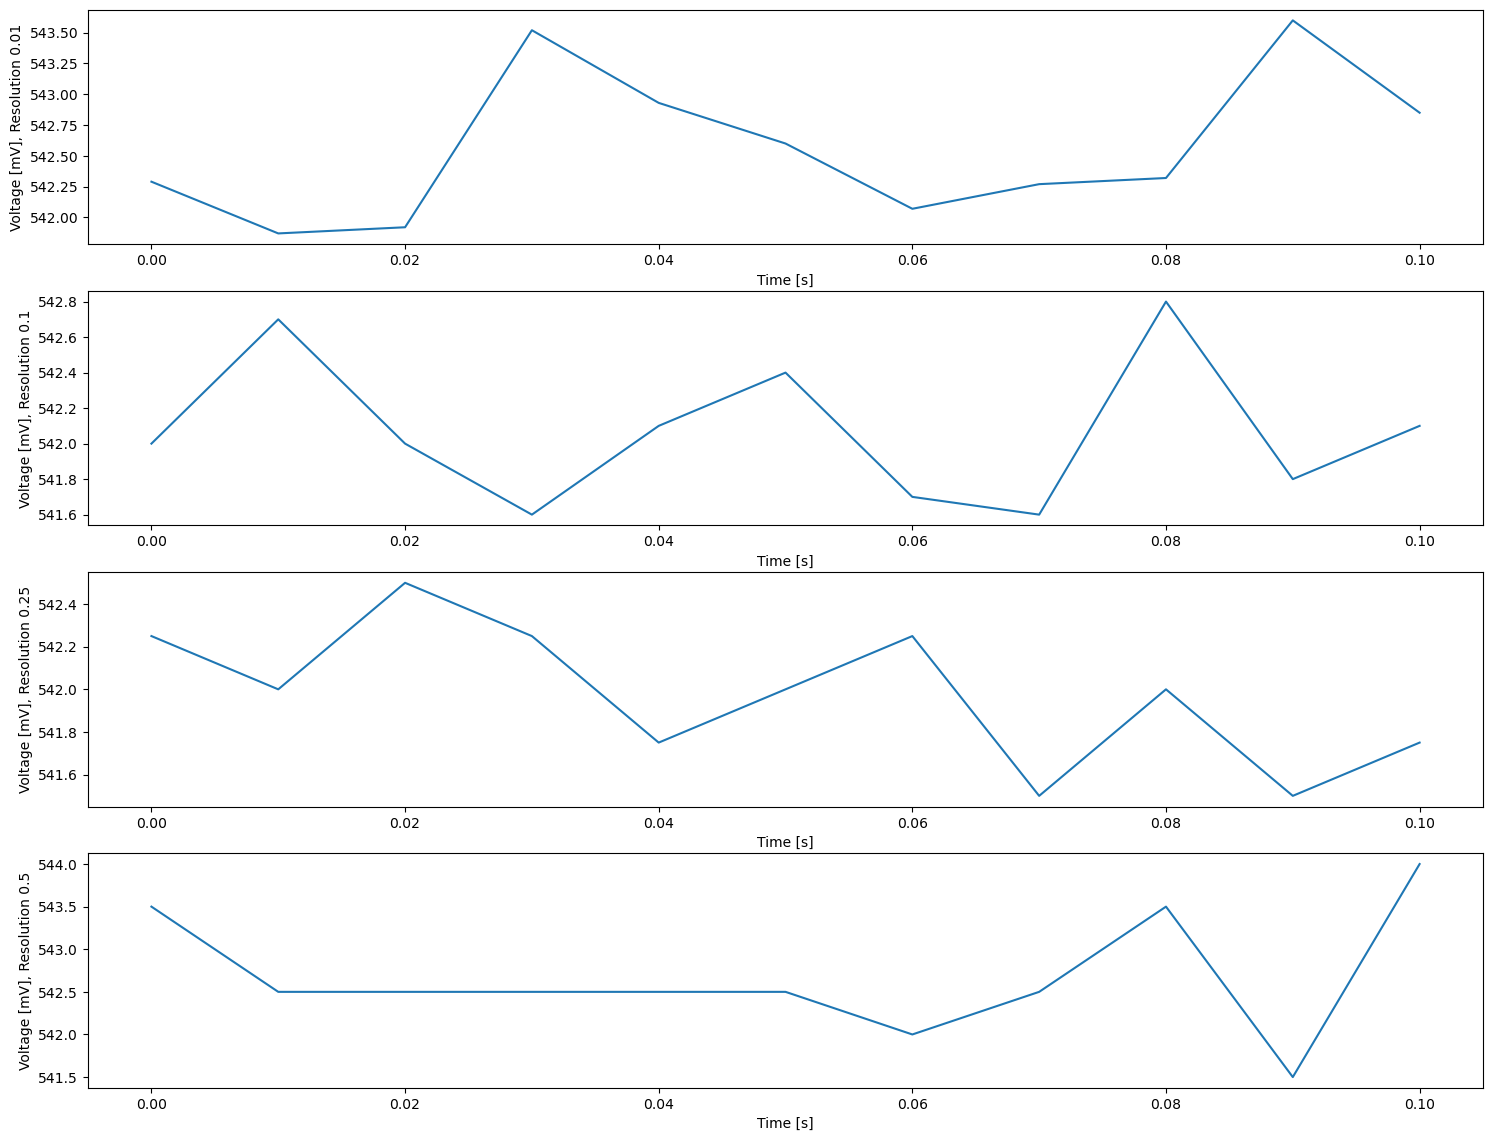

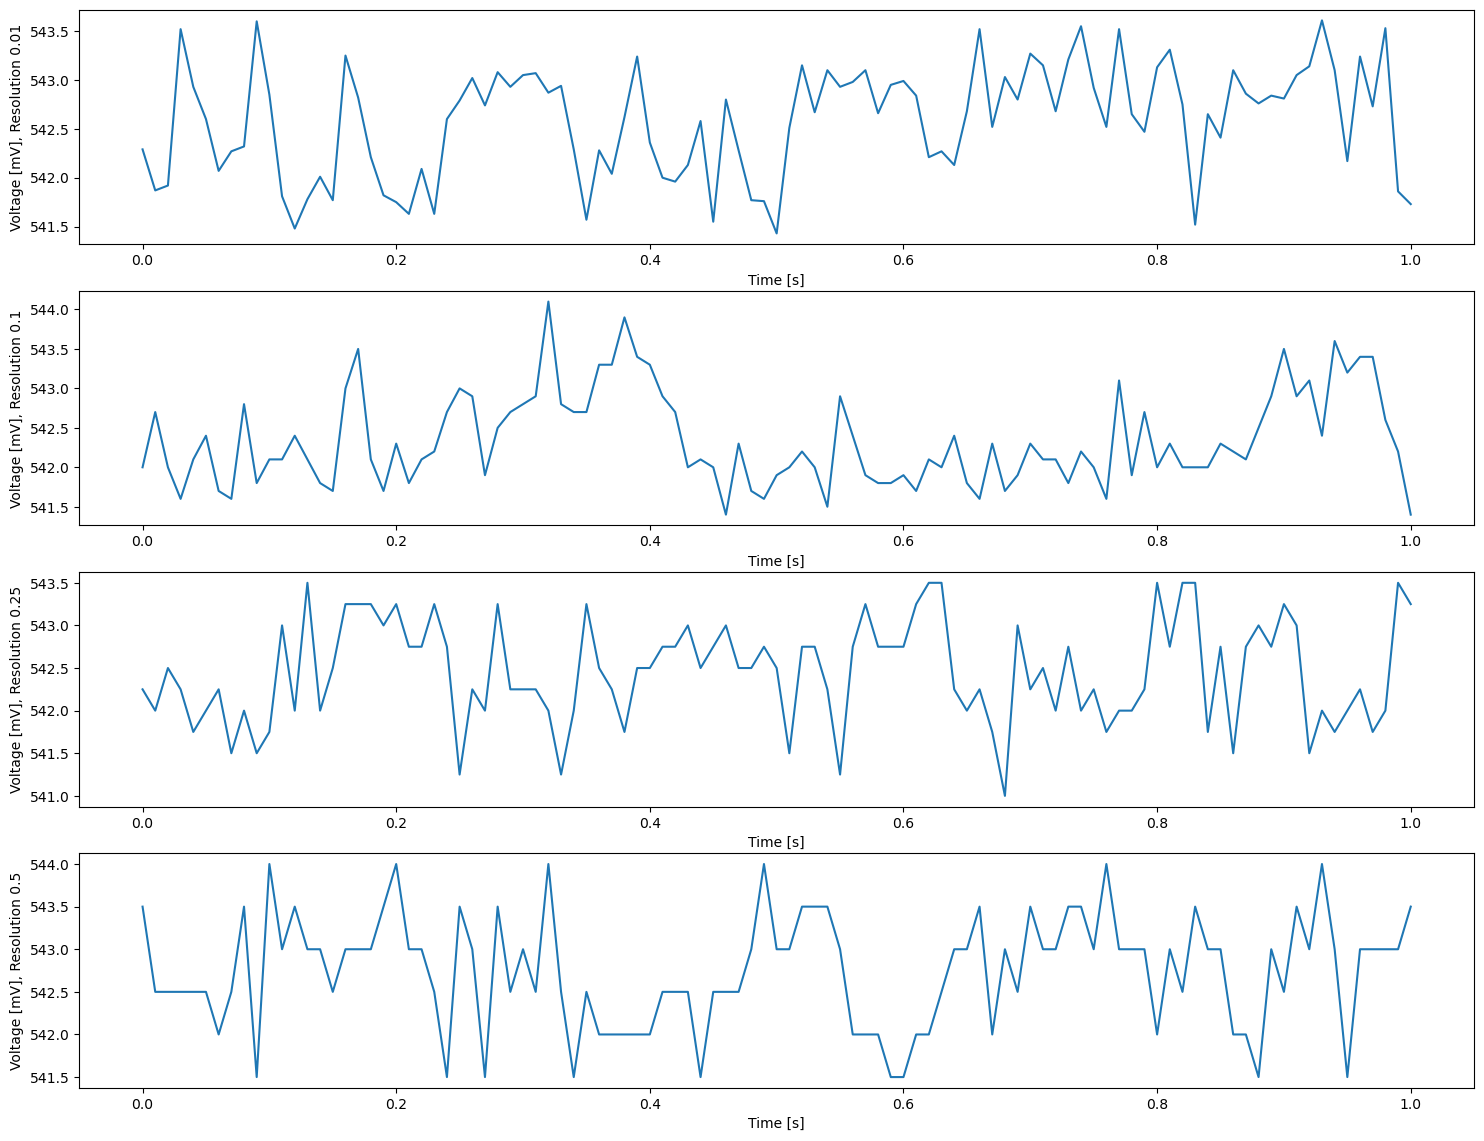

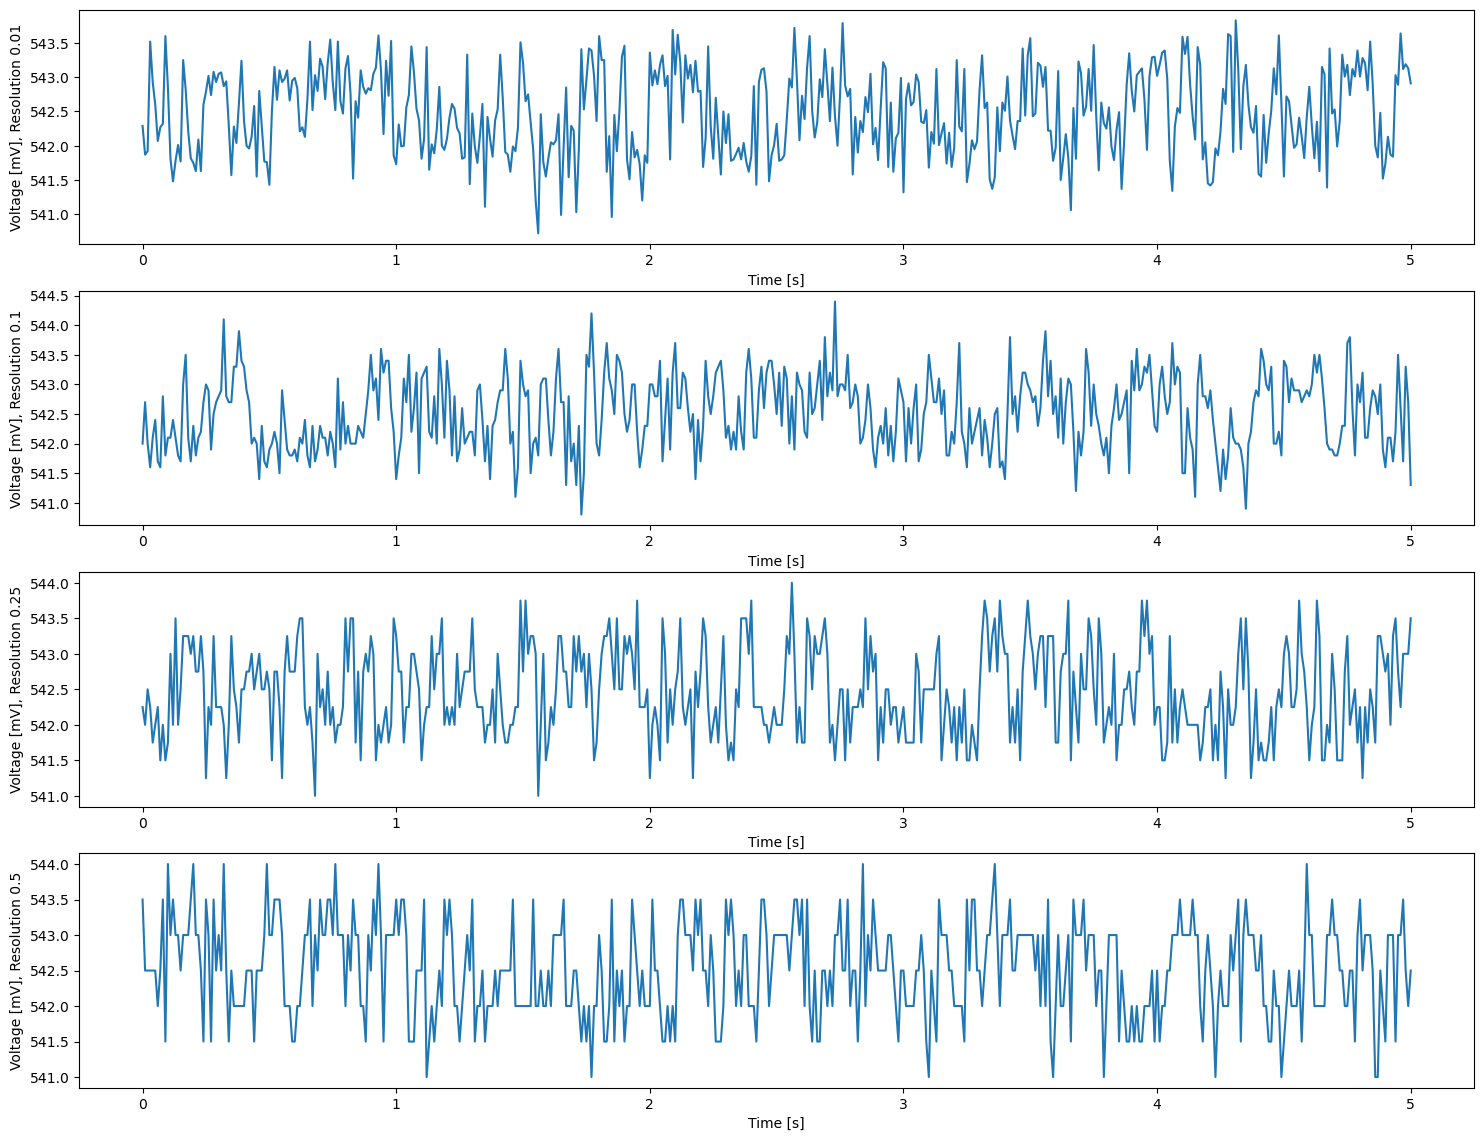

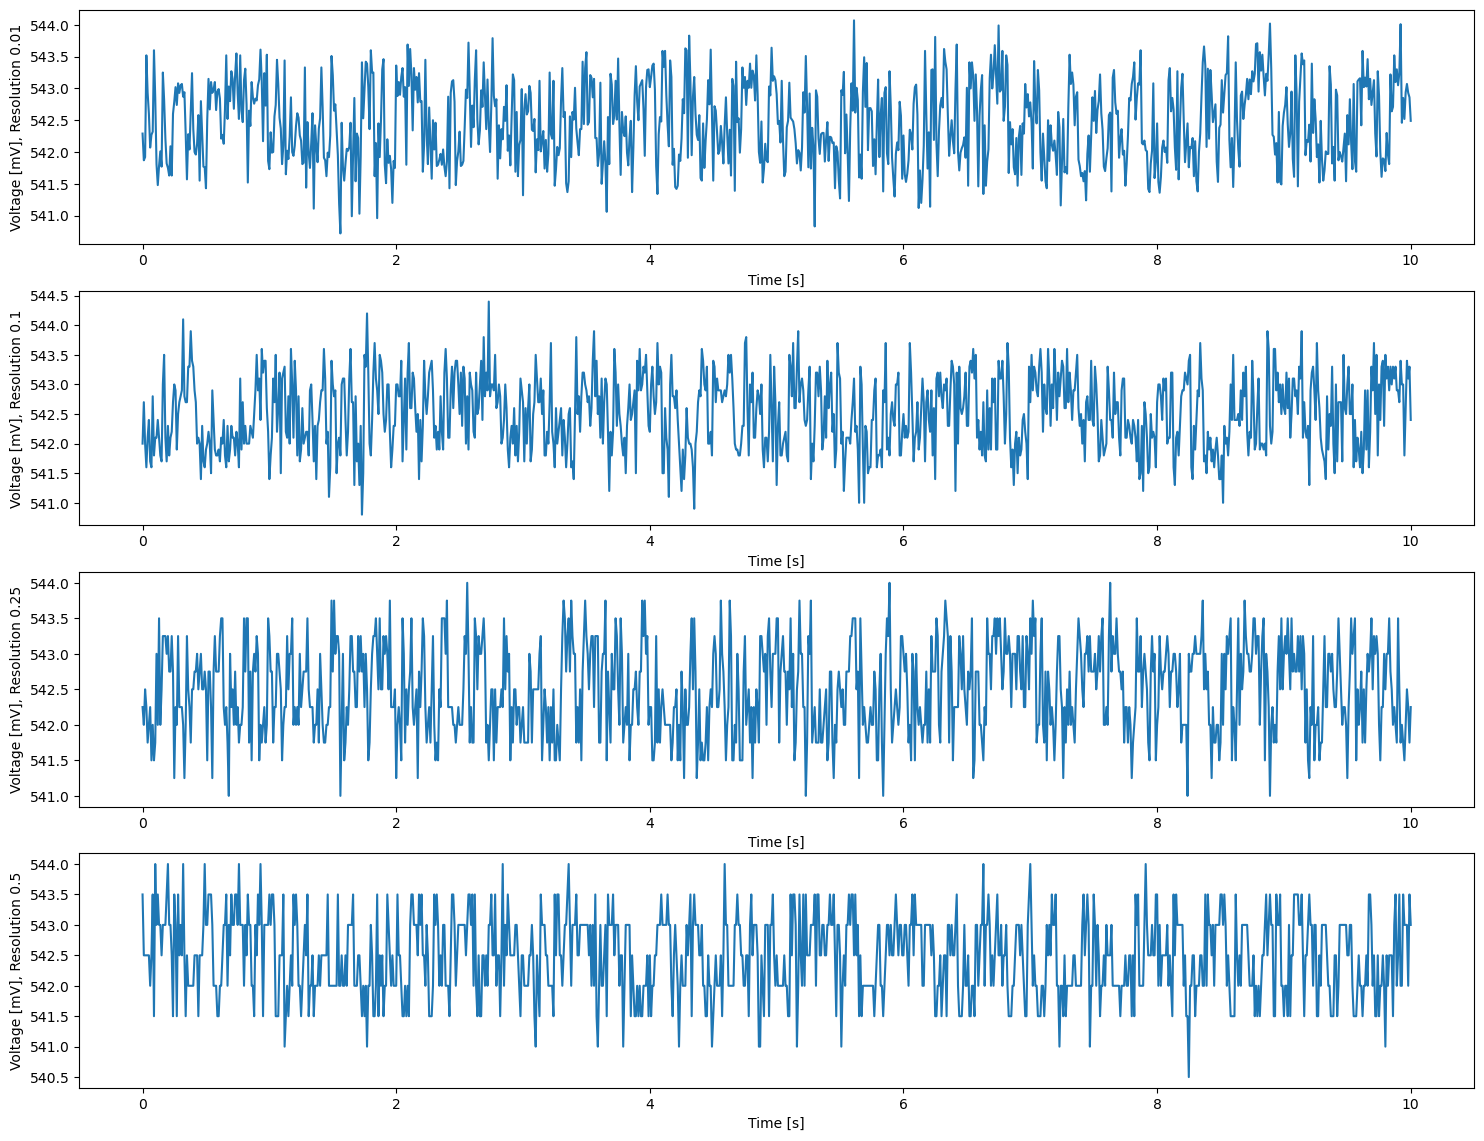

In [91]:
for j in (11, 101, 501, 1001):
    fig, ax = plt.subplots(4, figsize=(18,14))
    for i, d in enumerate(data):
        ax[i].set_xlabel('Time [s]')
        ax[i].set_ylabel(f'Voltage [mV], Resolution {res[i]:.2}')
        ax[i].plot(d[:j, 0], d[:j, 1])

## d)

Erstellen Sie ein Histogramm für jede Messung und plotten Sie es. Um das Histogramm zu berechnen, können Sie np.histogram() und um es in der gewohnten Balken-Form zu plotten ax.bar() verwenden. Die Grösse der Bins hat einen grossen Einfluss auf das Histogramm. Wählen Sie verschiedene Bingrössen aus, die für kleine oder grosse Signalauflösungen optimiert sind. Was passiert, wenn sie die Bingrösse kleiner als die Auflösung wählen?

Der Syntax der Funktionen finden Sie wieder mit der Hilfe Funktion: `np.histogram?` und `ax.bar?`. Alternativ können sie auf die Hyperlinks am Anfang des Übungsblattes klicken um zur Online-Dokumentation zu gelangen.

Um den Zusammenhang zwischen Signalauflösung und Bingrösse zu veranschaulichen, können Sie immer alle vier Histogramme mit derselben Bingrösse plotten und dann verschiedene Werte für die Bingrösse ausprobieren.

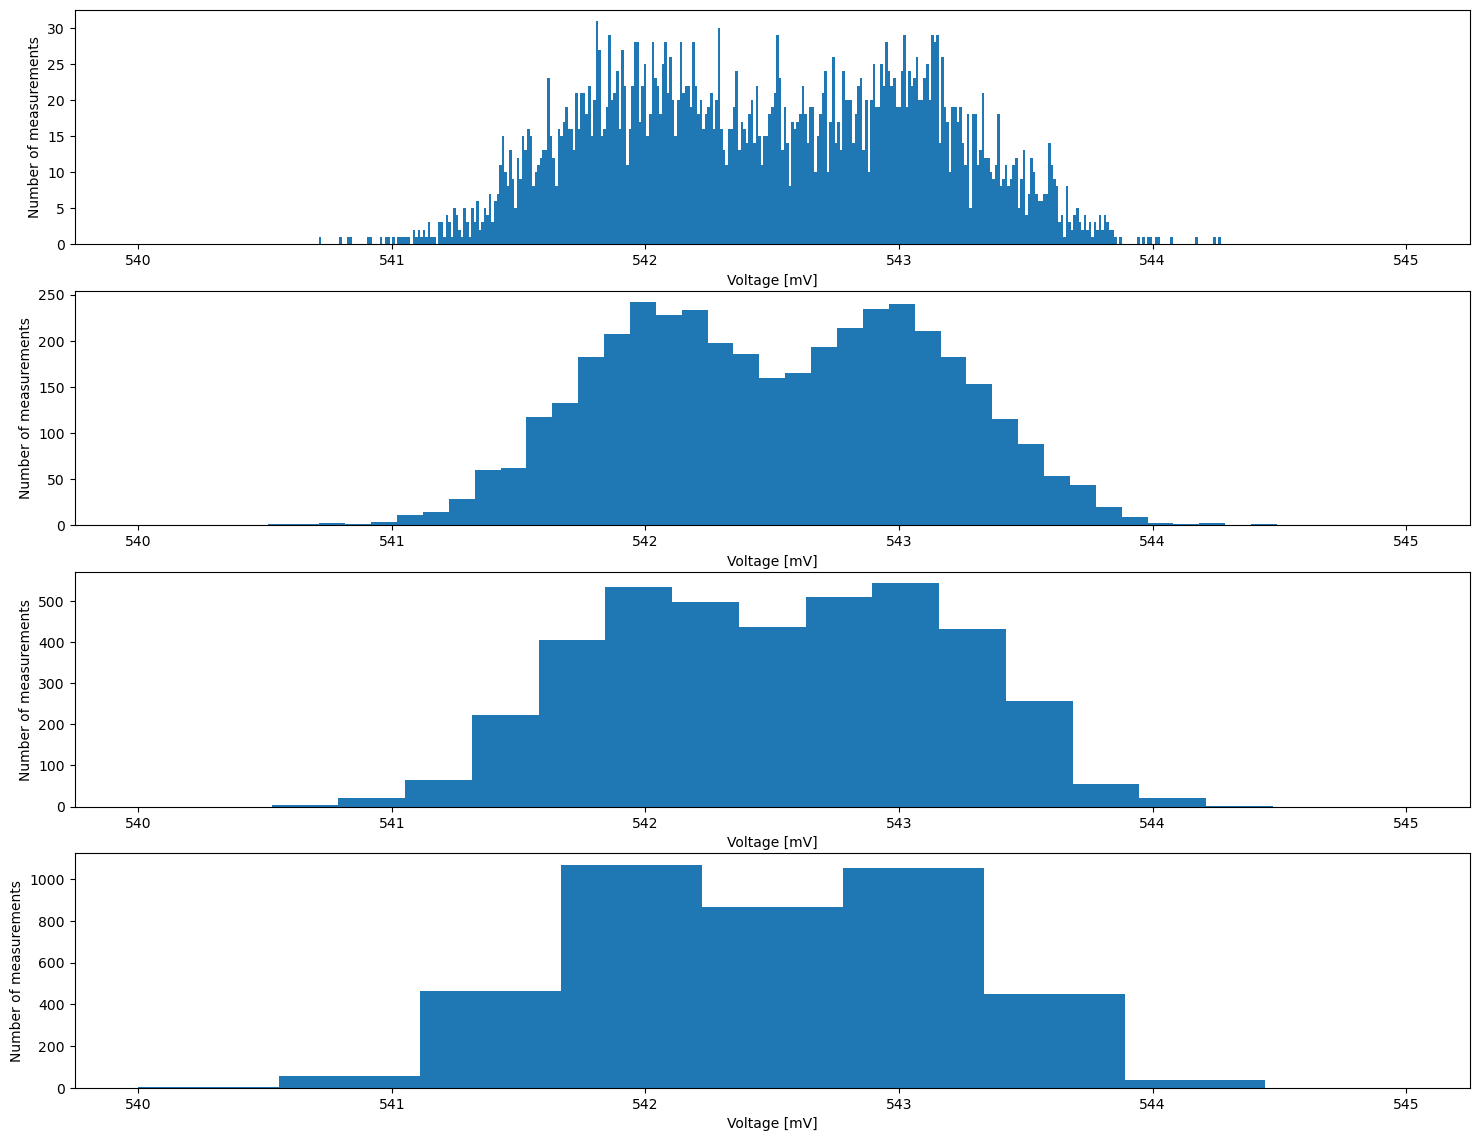

In [133]:
fig, ax = plt.subplots(4, figsize=(18,14))
for i, d in enumerate(data):
    ax[i].hist(d[:, 1], bins=np.linspace(math.floor(np.min(data[:, :, 1])), math.ceil(np.max(data[:, :, 1])), int(5/res[i])))
    ax[i].set_xlabel('Voltage [mV]')
    ax[i].set_ylabel('Number of measurements')
    #ax[i].plot(d[:, 0], d[:, 1])

## e)

Welche Auflösung würden Sie für diese Messung wählen? Wie hängt die benötigte Auflösung mit den charakteristischen Grössen der Verteilung der Messwerte (z.B. Streuung) zusammen?

In [137]:
for i, d in enumerate(data):
    print(f'Data {i+1} has {int(5/res[i]) - 1} bins')

Data 1 has 499 bins
Data 2 has 49 bins
Data 3 has 19 bins
Data 4 has 9 bins


# Aufgabe 2: Oszillierendes Signal und Samplingrate

Nun schauen wir uns den Einfluss der Samplingrate, d.h. der zeitlichen Auflösung, auf die Messung von oszillierenden Signalen an. Sie finden die Datensätze zu dieser Aufgabe im Ordner "Aufgabe 2".

## a)

Lesen Sie zuerst den Datensatz 'osc_data_1.txt' ein und bestimmen Sie die Samplingrate. Plotten Sie das Signal als Funktion der Zeit. Verwenden Sie im Plot Marker (z.B. Kreuze oder Punkte), um die Datenpunkte zu markieren.

Sample rate is 0.005


Text(0.5, 0, 'Time [s]')

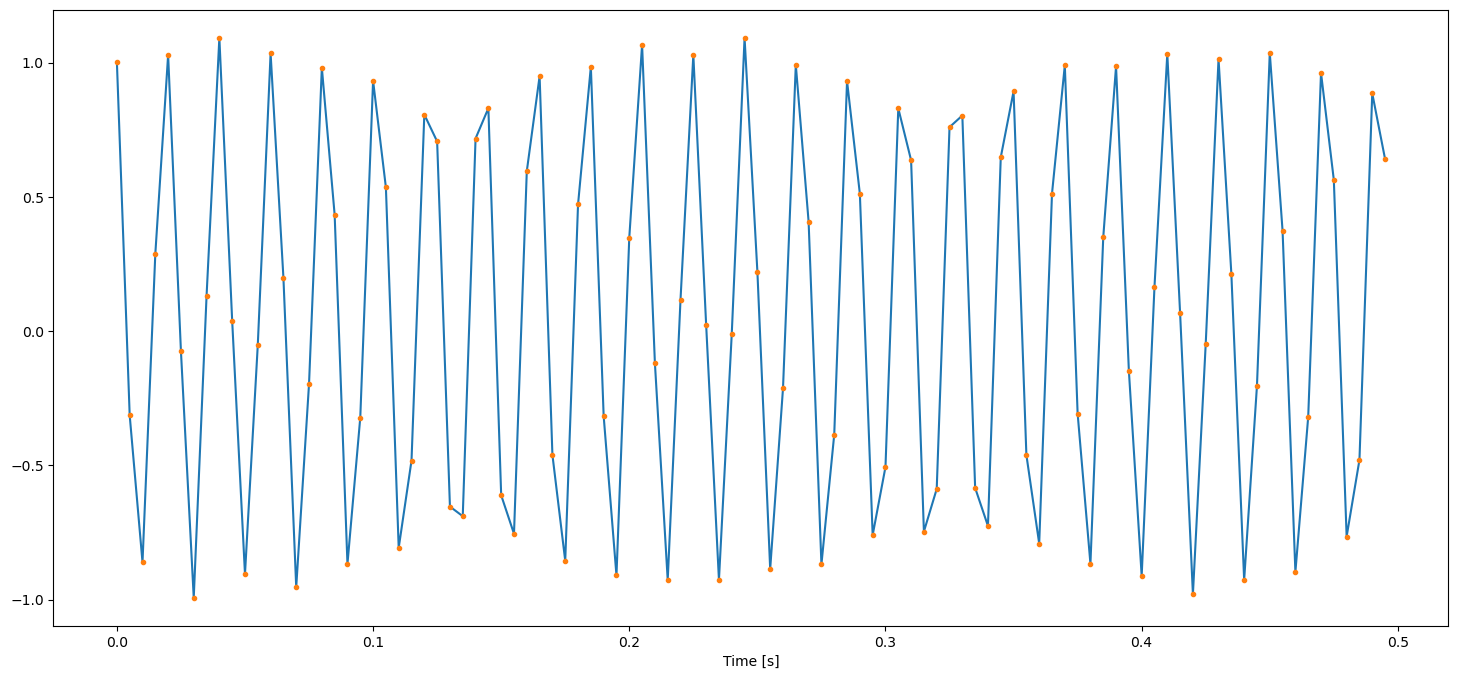

In [208]:
data = np.loadtxt('Aufgabe2/osc_data_1.txt', comments='#', delimiter=',')
print(f'Sample rate is {np.mean(np.diff(data[:, 0]))}')

fig, ax = plt.subplots(figsize=(18, 8))
ax.plot(data[:, 0], data[:, 1], '-')
ax.plot(data[:, 0], data[:, 1], '.')
ax.set_xlabel('Time [s]')

## b)

Lesen Sie die Oszillationsfrequenz des Signals aus Ihrem Plot ab.

In [214]:
print(f'The frequency is {24/(data[-2, 0] - data[0, 0]):.2f} Hz')

The frequency is 48.98 Hz


## c)

Lesen Sie nun die Datei 'osc_data_2.txt' ein, bestimmen Sie die Samplingrate, plotten Sie das Signal und bestimmen Sie die Frequenz.

The frequency is 151.36 Hz


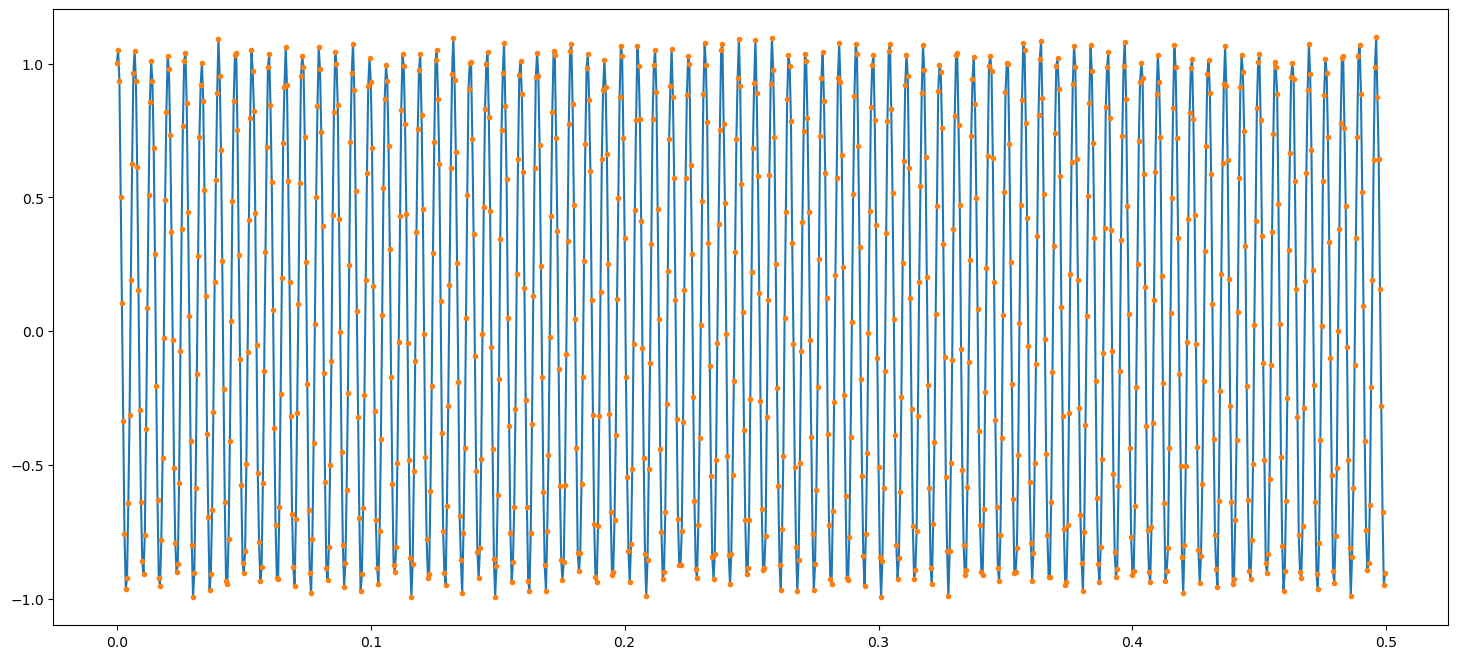

In [216]:
data2 = np.loadtxt('Aufgabe2/osc_data_2.txt', comments='#', delimiter=',')

fig, ax = plt.subplots(figsize=(18, 8))
ax.plot(data2[:, 0], data2[:, 1], '-')
ax.plot(data2[:, 0], data2[:, 1], '.')

print(f'The frequency is {75/(data2[-8, 0] - data2[1, 0]):.2f} Hz')

## d)

Plotten Sie beide Datensätze im selbem Plot. Was stellen Sie fest?

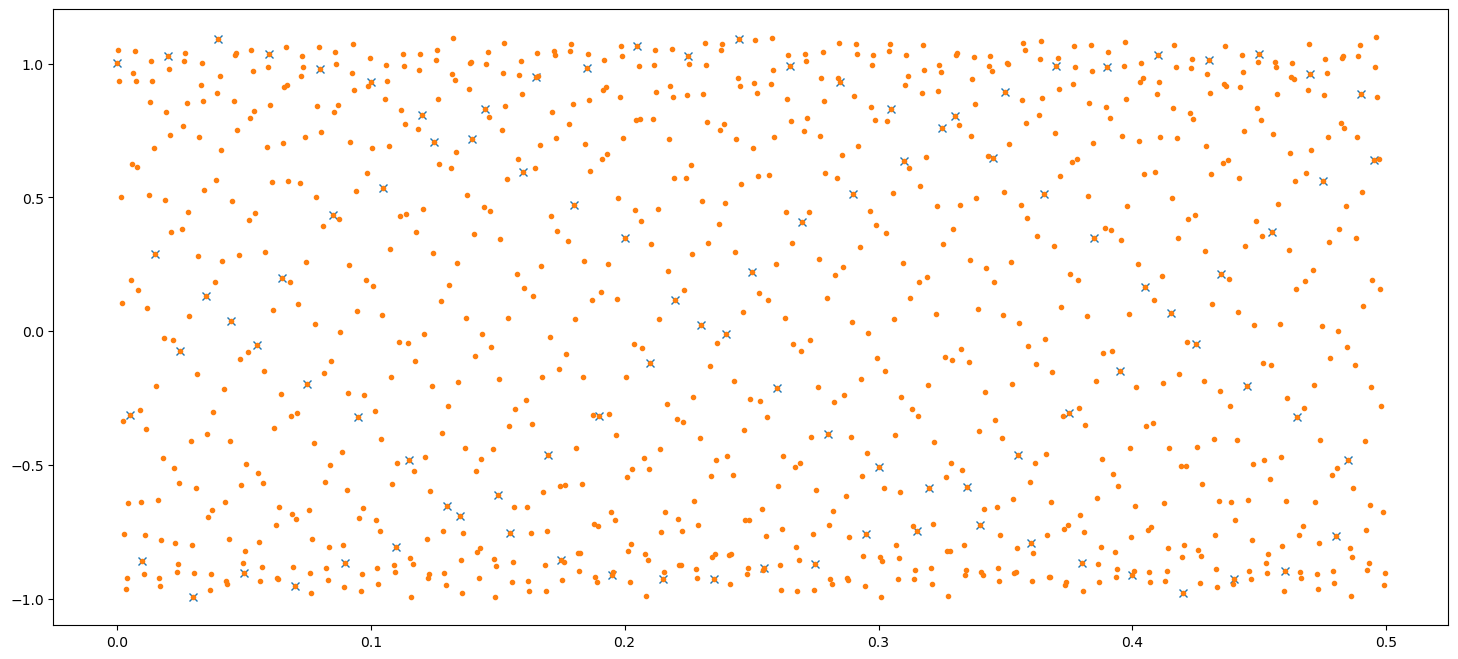

In [193]:
fig, ax = plt.subplots(figsize=(18, 8))
ax.plot(data[:, 0], data[:, 1], 'x')
ax.plot(data2[:, 0], data2[:, 1], '.')

## Freiwillige Zusatzaufgabe: Frequenz automatisch bestimmen

In Aufgaben b) und c) haben Sie die ungefähre Frequenz von Auge aus dem Plot abgelesen. Überlegen Sie sich, wie Sie die Frequenz programmatisch aus dem Signal bestimmen könnten, und versuchen Sie Ihren Algorithmus zu implementieren.

Da wir erst später in der Vorlesung genauer auf die Analyse die Analyse von oszillierenden Signalen zu sprechen kommen, brauchen Sie sich keine Gedanken zu machen, wenn Sie diese Aufgabe nicht bearbeiten möchten.